# Example: Heating a Metal Slab

You were probably thinking in the last notebook, *we are just learning math... how are finite difference formulas useful for **chemical** engineers?!?!*.

We now have discussed enough of the basics to use finite difference formulas to estimate gradients (derivatives) for experiments. Consider a metal slab heated from one side with two temperature probes:

![slab](../../media/metal-slab.png)

As time elapses, the temperature throughout the slab increases. The temperature gradient in the slab can be modeled using Fourier's law of thermal conduction:

$$q_x = -k \frac{\partial T}{\partial x}$$

where $k$ is the thermal conductivity of the metal slab. We ultimately want to estimate this material property.

The key challenge in this experiment is estimating the temperature gradient, $\frac{\partial T}{\partial x}$. To accomplish this, the metal slab has been equipped with two temperature probes, one located at $x=0$ (probe 1) and another located at $x=0.5$ (probe 2), as shown in the figure above. These two thermocouples have an absolute precision ($\sigma_{T1}$, $\sigma_{T2}$) of 0.02 $^\circ{}$C.

Using the measurements from probes 1 and 2, we can estimate the temperature gradient using a finite difference formula:

$$\left. \frac{\partial T}{\partial x} \right|_{x=0} \approx \frac{ \left. T \right|_{x=0.5} - \left. T \right|_{x=0}}{0.5}$$


In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Algorithm (Truncation) Error

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, <b>compute the algorithm (truncation) error</b> using this finite difference formula to approximate the thermal gradient and store in algo_error.
</div>

Hint: Start with a Taylor series expansion:

$$\left. T \right|_{x=h} = \left. T \right|_{x=0} + h \left. \frac{\partial T}{\partial x} \right|_{x=0} + \frac{1}{2} h^2 \left. \frac{\partial^2 T}{\partial x^2} \right|_{x = l}$$

where $l$ is a length on the slab between 0 and $h$ such that this formula is exact. Let's assume that $\frac{\partial^2 T}{\partial x^2} \approx 4 ~^\circ$C / unit length$^2$ and is constant along the slab. With this assumption, $l$ does not really matter.


In [23]:
### BEGIN SOLUTION
# expression for algorithm error
algo_error = 0.5*h*4 #(or 2*h)
### END SOLUTION

### Random Error

In a few notebooks, we will formally study probably theory and properties of random variables. If we assume the random errors associated with the temperature probes are independent, we will see soon that the random error in the temperature difference $\left. T \right|_{x=0.5} - \left. T \right|_{x=0}$ is:

$$\sigma_{\Delta T} = \sqrt{\sigma_{T1}^2 + \sigma_{T2}^2}$$


<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, <b>compute the random error</b> using the <b>finite difference formula</b> to approximate the thermal gradient. 
</div>


### Optimal Location

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Imagine we can move probe 2 from $h=0.5$ to another location. With a partner, <b> determine the optimal location</b> such that the truncation error and random error are the same order of magnitude. 
</div>

Hints: The optimal location is approximated when the truncation error and random error are the same order of magnitude. Modify your expressions for algorithm error and random error from above to depend on $h$, then set them equal, and finally solve for $h$. This is the optimal location.

In [6]:
### BEGIN SOLUTION
# optimal location h occurs when...
h = np.sqrt(2*np.sqrt(sigma_T1**2+sigma_T2**2)/4)
### END SOLUTION

NameError: name 'sigma_T1' is not defined

### Visualize the Results

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Plot your expression of the absolute value of <tt>random error</tt> and <tt>truncation error</tt>. Does this trade-off remind you of plots from the previous two notebooks?
</div>

Optimal h:
 0.11892071150027211


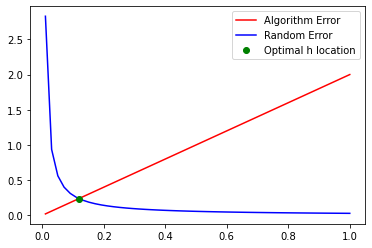

In [22]:
### BEGIN SOLUTION
# create h vector
h=np.linspace(0.01,1)

# set algorithm error
algo_error = 0.5*h*4

# set sigmas
sigma_T1=0.02
sigma_T2=0.02

# set random error
random_error = np.sqrt(sigma_T1**2+sigma_T2**2)/h

# plot errors
plt.plot(h,algo_error, color='red',label='Algorithm Error')
plt.plot(h,random_error, color='blue',label='Random Error')

# calculate optimal h location
h_opt = np.sqrt(2*np.sqrt(sigma_T1**2+sigma_T2**2)/4)
print('Optimal h:\n',h_opt)

# plot optimal h location
y_opt = 0.5*h_opt*4 # found y_opt to plot point (could have used either error formula)
plt.plot(h_opt,y_opt,'go',label='Optimal h location')
plt.legend()
plt.show()
### END SOLUTION